In [1]:
using BIPs
using Statistics
using Pkg.Artifacts

In [2]:
sample_path = "../storage/sample.h5"

"../storage/sample.h5"

In [3]:
sample_jets, sample_labels = BIPs.read_data("TQ", sample_path)
sample_labels = [reinterpret(Bool, b == 1.0) for b in sample_labels]
length(sample_labels)

10000

In [4]:
sample_transf_jets = data2hyp(sample_jets)
println("Transformed jets: ", length(sample_transf_jets))

Transformed jets: 10000


In [35]:
f_bip, specs = build_ip(order=4, levels=7)
    
function bip_data(dataset_jets)
    storage = zeros(length(dataset_jets), length(specs))
    for i = 1:length(dataset_jets)
        storage[i, :] = f_bip(dataset_jets[i])
    end
    storage[:, 2:end]
end

bip_data (generic function with 1 method)

In [36]:
embedded_sample = bip_data(sample_transf_jets)
println("Embedded sample jets correclty")

Embedded sample jets correclty


In [37]:
using PyCall
@pyimport umap as py_umap;
@pyimport sklearn.mixture as sk_mixture

In [48]:
using Statistics, LinearAlgebra
scale(A) = (A .- mean(A, dims=1)) ./ std(A, dims=1)
n_embedded_sample = scale(embedded_sample[:, 2:end])
println("Scaled embedded sample jets")

Scaled embedded sample jets


In [89]:
umap = py_umap.UMAP(n_neighbors=200, n_components = 3)[:fit_transform](embedded_sample)
print("UMAP done")

UMAP done

In [53]:
using PlotlyJS

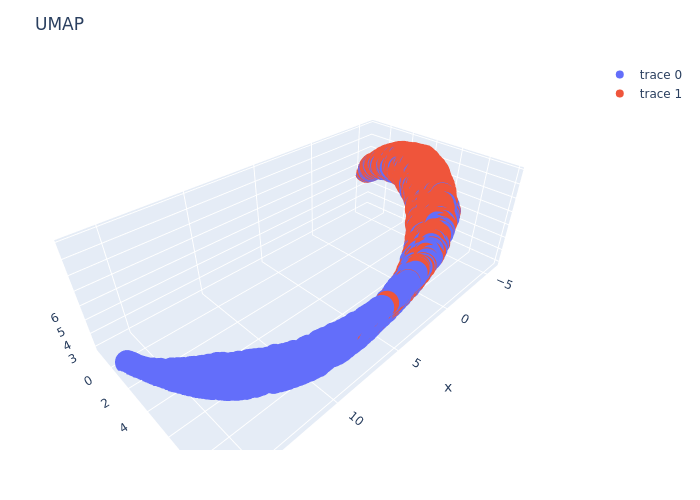

In [97]:
bkg = [label==false for label in sample_labels ]
trace_1 = PlotlyJS.scatter3d(;
    x=vec(umap[:, 1][bkg]), y=vec(umap[:, 2][bkg]), z=vec(umap[:, 3][bkg]),
    mode="markers", size=1, color="red", text="Background")
trace_2 = PlotlyJS.scatter3d(;
    x=vec(umap[:, 1][sample_labels]), y=vec(umap[:, 2][sample_labels]), z=vec(umap[:, 3][sample_labels]),
    mode="markers", size=1, color="blue", text="Signal")

layout = PlotlyJS.Layout(title="UMAP",)
PlotlyJS.plot([trace_1, trace_2], layout)